In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**The data comes from here: https://data.cityofnewyork.us/City-Government/Property-Valuation-and-Assessment-Data/yjxr-fw8i**


**Here we read the validation data as a pandas dataframe:**

In [2]:
data = pd.read_csv('Property_Valuation_and_Assessment_Data.csv')

C:\Users\duoyi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Column headings and data preview:

In [3]:
print(data.columns)
data.head()

Index(['BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'POSTCODE', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'NTA', 'New Georeferenced Column'],
      dtype='object')


,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,VALTYPE,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA,New Georeferenced Column
0,1010401210,1,1040,1210,NaN,"H&G WARNER, LLC",R4,2,0,0,...,AC-TR,MANHATTAN,40.762988,-73.987791,104.0,3.0,127.0,1077841.0,Clinton,POINT (-73.987791 40.762988)
1,1008901282,1,890,1282,NaN,"SPERBER, LORRAINE",R4,2,0,0,...,AC-TR,MANHATTAN,40.746162,-73.979129,106.0,2.0,72.0,1018549.0,Murray Hill-Kips Bay,POINT (-73.979129 40.746162)
2,1009681288,1,968,1288,NaN,ROOS ESTHER A,R4,2,0,0,...,AC-TR,MANHATTAN,40.745156,-73.972500,106.0,4.0,8601.0,1022060.0,Turtle Bay-East Midtown,POINT (-73.9725 40.745156)
3,1008701611,1,870,1611,NaN,BARRETO ANITA,R4,2,244,425,...,AC-TR,MANHATTAN,40.734072,-73.988713,105.0,2.0,50.0,1083247.0,Gramercy,POINT (-73.988713 40.734072)
4,1010381112,1,1038,1112,NaN,NaN,R4,2,0,0,...,AC-TR,MANHATTAN,40.761262,-73.987572,104.0,3.0,127.0,1087980.0,Clinton,POINT (-73.987572 40.761262)


**Most expensive property in the data set:**

In [4]:
y = data[data['FULLVAL'] > 7000000000]
y[['STADDR','YEAR', 'PERIOD']]

,STADDR,YEAR,PERIOD
2224354,1000 5 AVENUE,2018/19,FINAL
3323097,1000 5 AVENUE,2017/18,FINAL
4426251,1000 5 AVENUE,2016/17,FINAL
5539823,1000 5 AVENUE,2015/16,FINAL


## Plotting some features to see if there are any outliers:

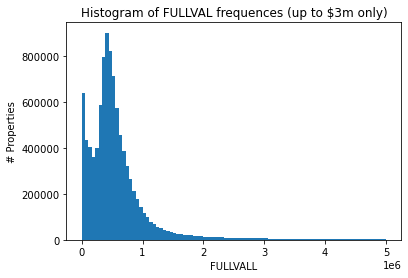

In [5]:
plt.hist(data['FULLVAL'], bins=90, range=(0,5000000))
plt.ylabel('# Properties')
plt.xlabel('FULLVALL')
plt.title('Histogram of FULLVAL frequences (up to $3m only)')
plt.show()

**Comment:** Clearly there are many properties going for a very low amount - potentially we need to remove these from the analysis. I have limited this to properties up to \$USD 3m - the tail end of the distribution is **extremely** long. The most expensive property in the data is worth almost $8bn:

In [6]:
print('The most expensive property in the data is valued at ${:,.2f}'.format(np.max(data['FULLVAL'])))

The most expensive property in the data is valued at $7,786,157,000.00


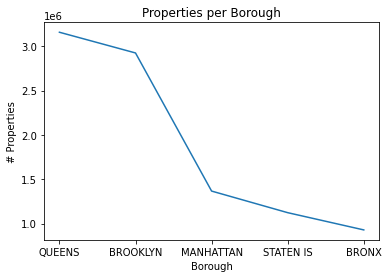

In [7]:
plt.plot(data['Borough'].value_counts())
plt.ylabel('# Properties')
plt.xlabel('Borough')
plt.title('Properties per Borough')
plt.show()

**Comment:** Makes sense given the relative size of each borough

C:\Users\duoyi\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\duoyi\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


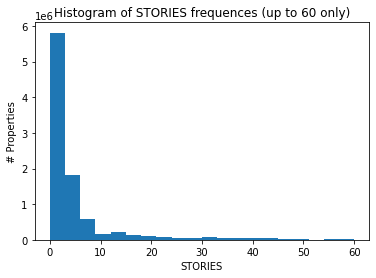

In [8]:
plt.hist(data['STORIES'], bins=20,range=(0,60))
plt.ylabel('# Properties')
plt.xlabel('STORIES')
plt.title('Histogram of STORIES frequences (up to 60 only)')
plt.show()

**Comments:** We have 60-floor buildings in the data set - do we want to include skyscrapers in our model? Arguments against:
- There are very few skyscraper sales
- Much harder to predict
- Might throw the model off on normal real estate sales

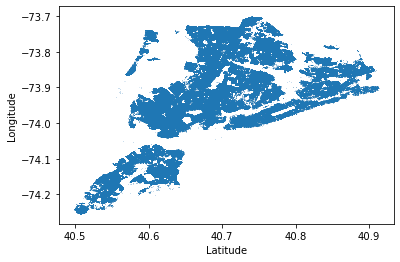

In [9]:
plt.scatter(data['Latitude'],data['Longitude'],s=0.0001)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**Comments:** We have pretty good lat and long data here - which I think might be superior to street address. Also fun to see a ghost map of NYC when we scatter the data!

## BUILDING CLASSES:

In [10]:
np.sort(data['BLDGCL'].unique())

array(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1',
       'B2', 'B3', 'B9', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'CM', 'D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'E1', 'E2', 'E3', 'E4', 'E6', 'E7', 'E9', 'F1', 'F2',
       'F4', 'F5', 'F8', 'F9', 'G0', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6',
       'G7', 'G8', 'G9', 'GU', 'GW', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6',
       'H7', 'H8', 'H9', 'HB', 'HH', 'HR', 'HS', 'I1', 'I2', 'I3', 'I4',
       'I5', 'I6', 'I7', 'I9', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7',
       'J8', 'J9', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9',
       'L1', 'L2', 'L3', 'L8', 'L9', 'M1', 'M2', 'M3', 'M4', 'M9', 'N1',
       'N2', 'N3', 'N4', 'N9', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7',
       'O8', 'O9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'R0', 'R1',
       'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R

We have agreed that we want to work with a specific subset of real estate - that is, residential buildings, rather than commercial buildings. The Building Class ('BLDGCL') is a useful feature that tells us the type of a given property. See link: https://www.propertyshark.com/mason/text/nyc_building_class.html

In general we would want to work with building classes A, B, C, D, R, and perhaps S (mixed class).

## Building Class Exploration:

In [44]:
print(pd.crosstab(index=data['BLDGCL'],columns='count').to_string())

col_0     count
BLDGCL         
A0        64595
A1      1111383
A2       445418
A3        60826
A4        36455
A5       882089
A6         8867
A7         3302
A8          261
A9       229398
B1       761357
B2       704461
B3       537008
B9       234138
C0       658431
C1       135336
C2       121876
C3       146757
C4        28546
C5        24662
C6        29138
C7        68268
C8          151
C9         3796
CM            3
D0         2401
D1        45540
D2          712
D3         9277
D4        31782
D5         2769
D6         7250
D7        16621
D8         1477
D9         8590
E1        18821
E2          784
E3         7745
E4         1097
E6            1
E7         1992
E9        26211
F1         4738
F2          944
F4        10160
F5         5396
F8          230
F9        16439
G0        24808
G1         9004
G2        17498
G3          688
G4         4071
G5         2300
G6         6069
G7        49396
G8         1894
G9        19600
GU          342
GW          395
H1      

Here we export the building class frequency table to a CSV because I find Excel easier to explore with:

In [32]:
class_freq = data['BLDGCL'].value_counts()
class_freq.to_csv('class_freq2.csv', index=True)

Use the function below to explore the value distribution for a single building class:

In [72]:
def class_dis(cl):
    plt.hist(data[data['BLDGCL']==cl]['FULLVAL'],bins=50, range=(0, np.percentile(data[data['BLDGCL']==cl]['FULLVAL'],99)))
    plt.ylabel('# Properties')
    plt.xlabel('FULLVAL')
    plt.title('FULLVAL distribution for building class {}'.format(cl))
    plt.show()

## FULLVAL distributions for A-class buildings:

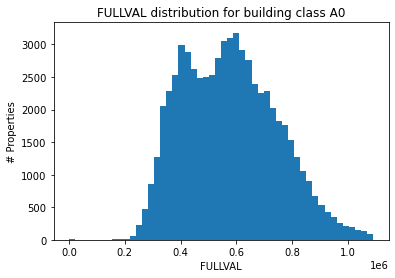

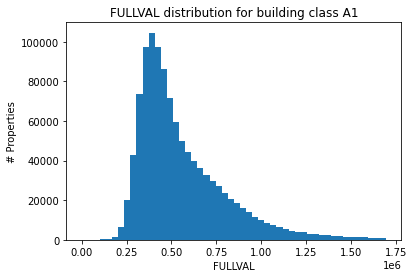

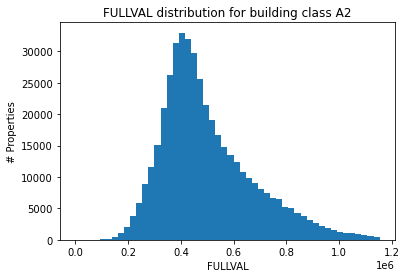

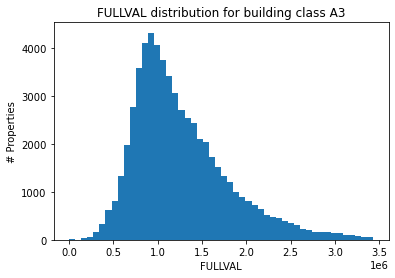

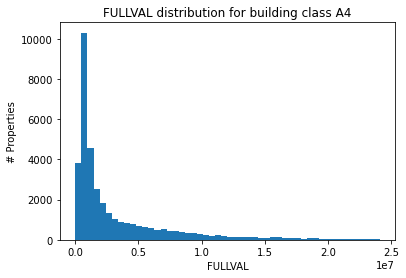

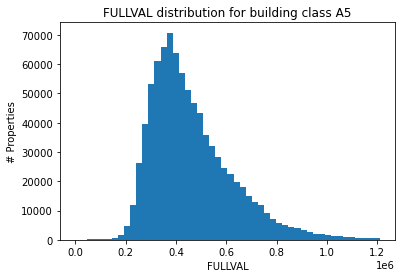

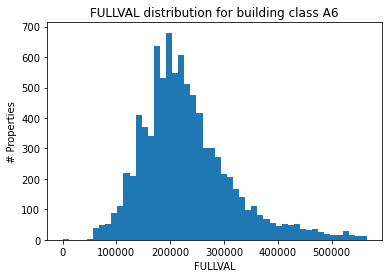

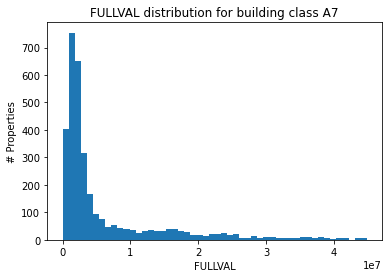

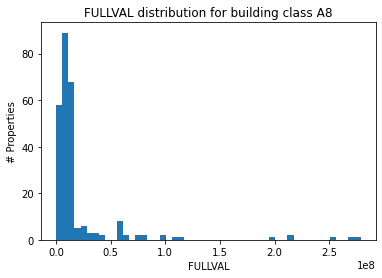

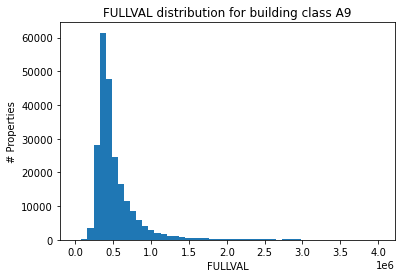

In [90]:
A_classes = ['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']
for i in A_classes:
    class_dis(i)

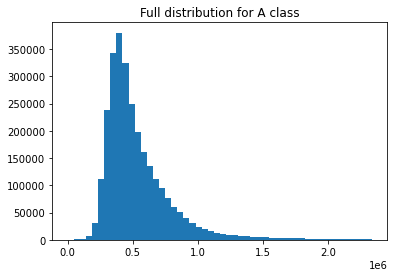

In [92]:
plt.hist(data[data['BLDGCL'].isin(A_classes)]['FULLVAL'],bins=50, range=(0, np.percentile(data[data['BLDGCL'].isin(A_classes)]['FULLVAL'],99)))
plt.title('Full distribution for A class')
plt.show()

## FULLVAL distributions for B-class buildings:

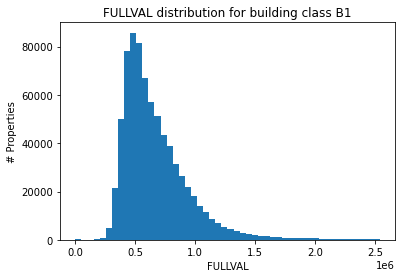

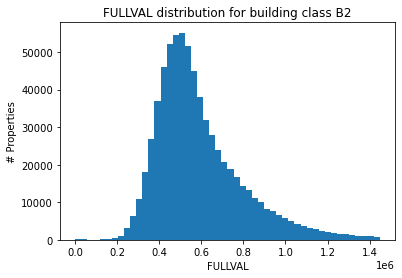

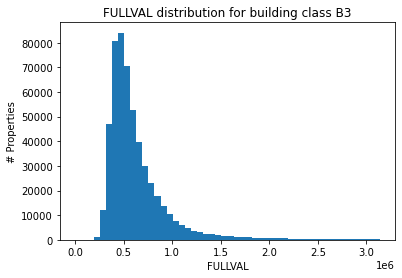

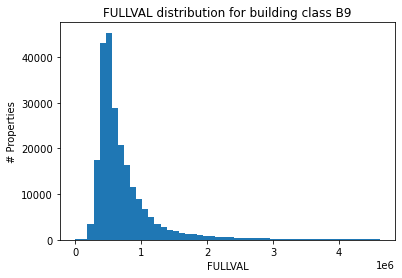

In [93]:
B_classes = ['B1', 'B2', 'B3', 'B9']
for i in B_classes:
    class_dis(i)

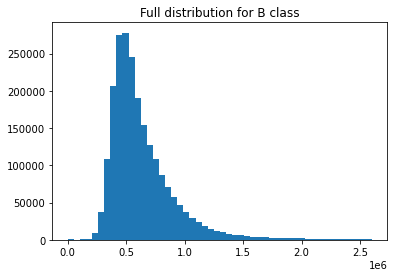

In [94]:
plt.hist(data[data['BLDGCL'].isin(B_classes)]['FULLVAL'],bins=50, range=(0, np.percentile(data[data['BLDGCL'].isin(B_classes)]['FULLVAL'],99)))
plt.title('Full distribution for B class')
plt.show()

## FULLVAL distributions for C-class buildings:

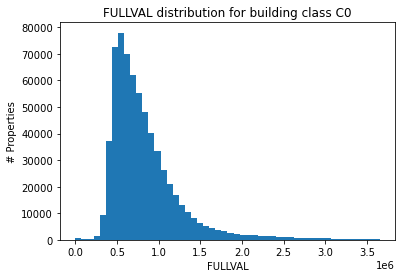

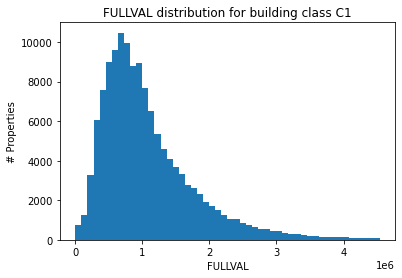

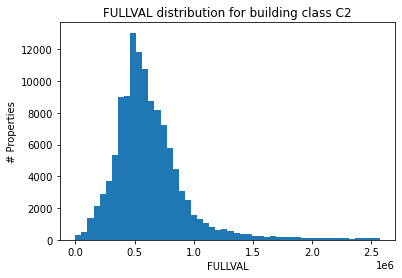

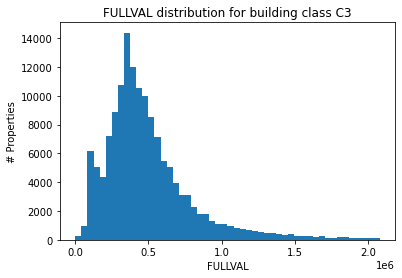

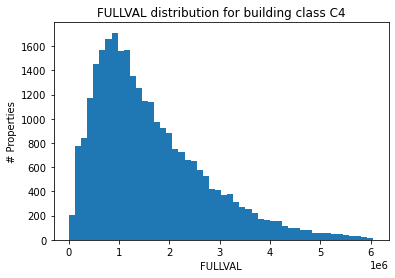

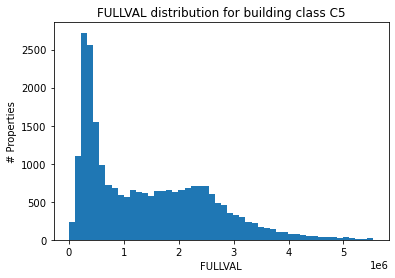

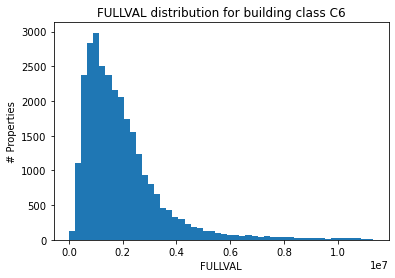

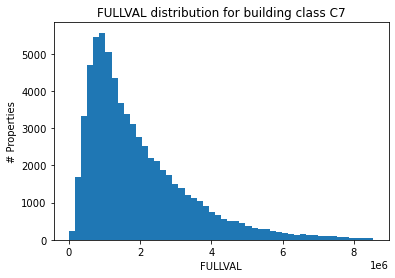

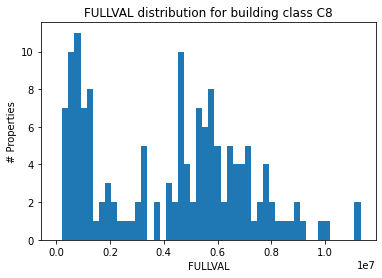

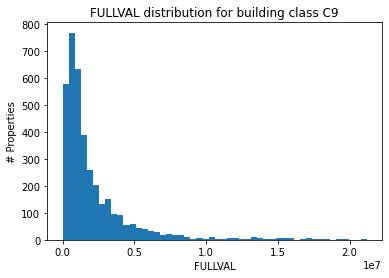

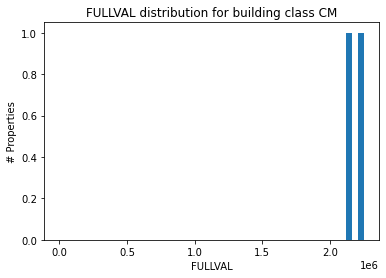

In [96]:
C_classes = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'CM']
for i in C_classes:
    class_dis(i)

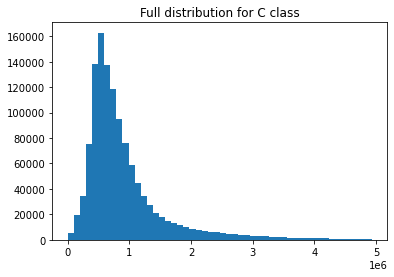

In [97]:
plt.hist(data[data['BLDGCL'].isin(C_classes)]['FULLVAL'],bins=50, range=(0, np.percentile(data[data['BLDGCL'].isin(C_classes)]['FULLVAL'],99)))
plt.title('Full distribution for C class')
plt.show()

## FULLVAL distributions for D-class buildings:

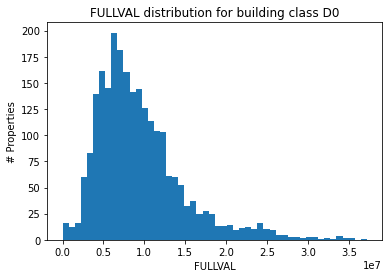

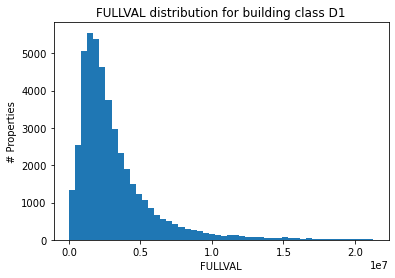

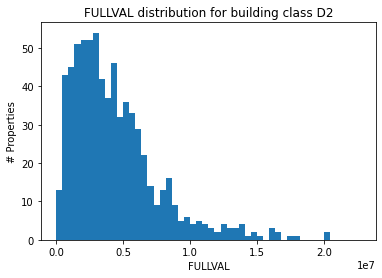

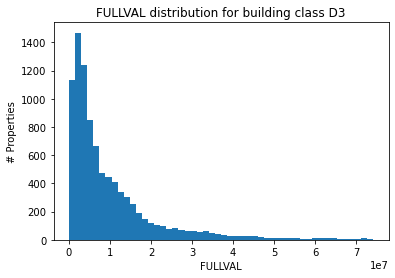

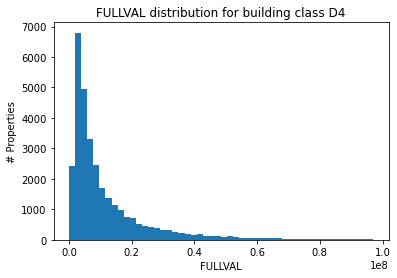

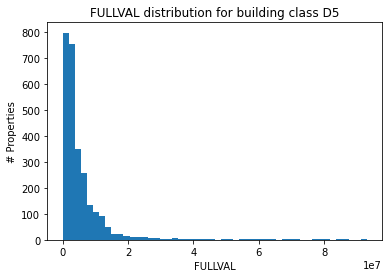

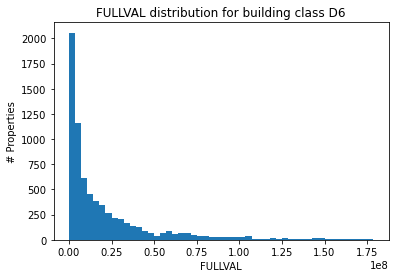

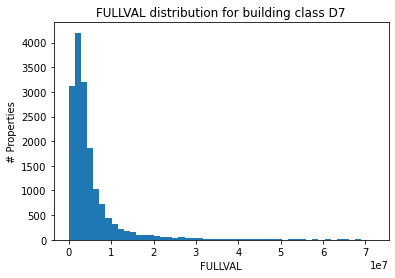

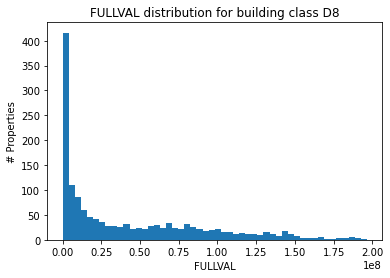

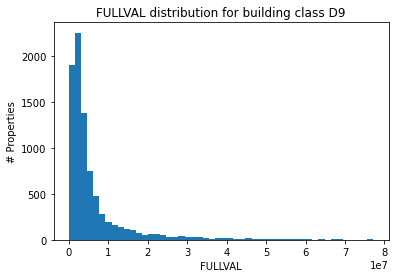

In [98]:
D_classes = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']
for i in D_classes:
    class_dis(i)

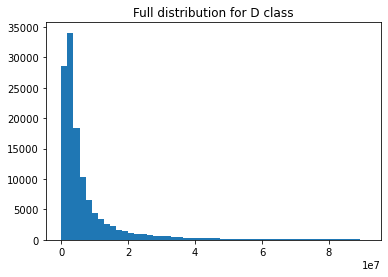

In [99]:
plt.hist(data[data['BLDGCL'].isin(D_classes)]['FULLVAL'],bins=50, range=(0, np.percentile(data[data['BLDGCL'].isin(D_classes)]['FULLVAL'],99)))
plt.title('Full distribution for D class')
plt.show()

## FULLVAL distributions for R-class buildings:

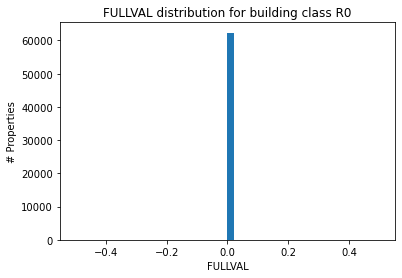

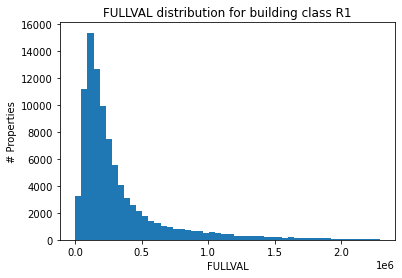

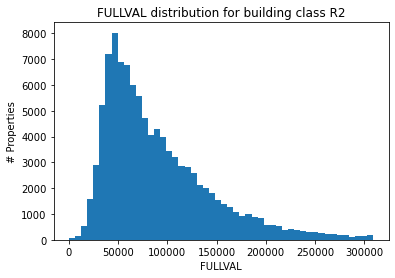

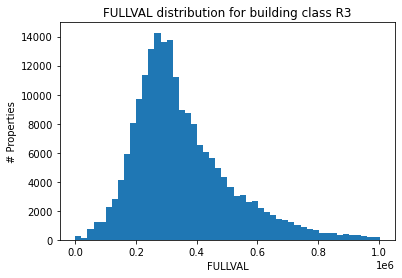

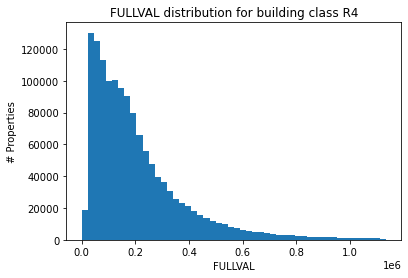

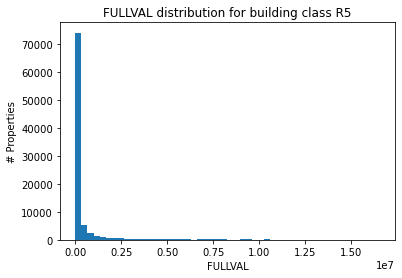

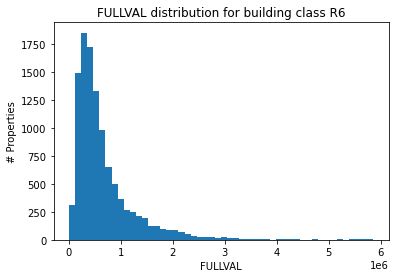

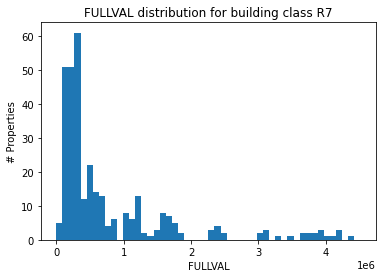

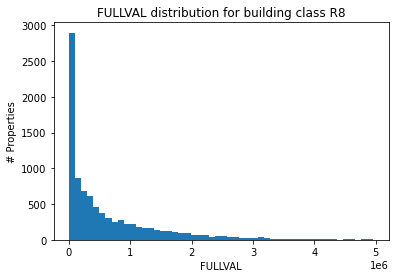

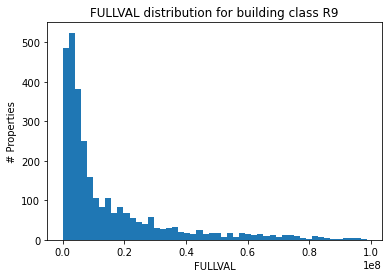

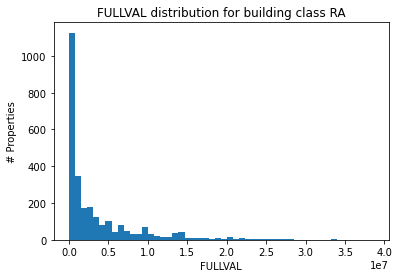

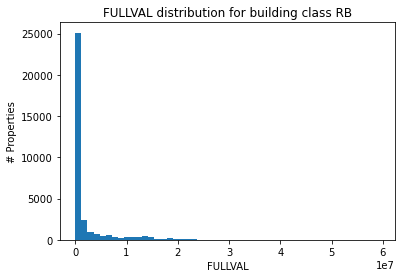

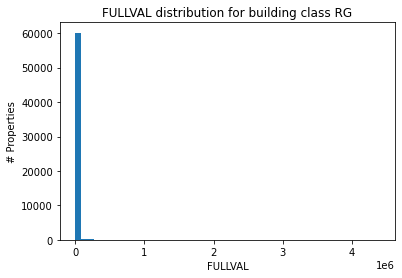

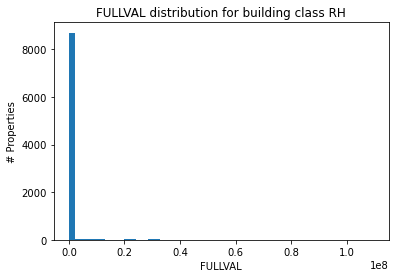

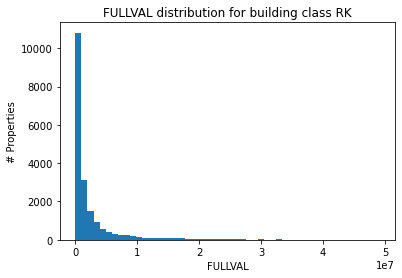

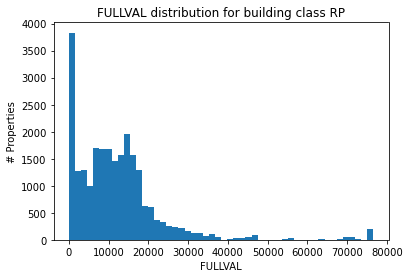

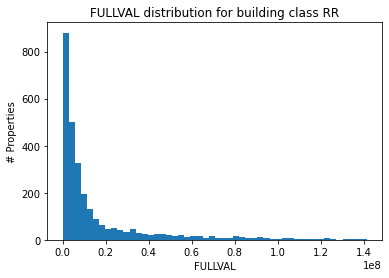

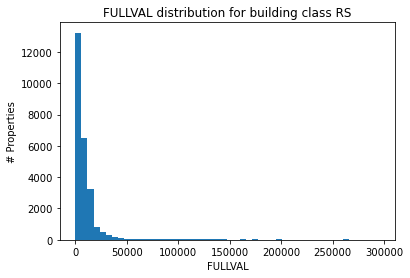

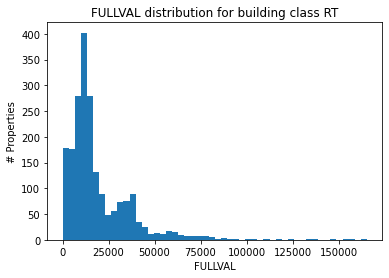

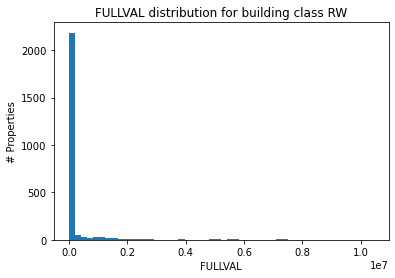

In [100]:
R_classes = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'RA', 'RB', 'RG', 'RH', 'RK', 'RP', 'RR', 'RS', 'RT', 'RW']
for i in R_classes:
    class_dis(i)

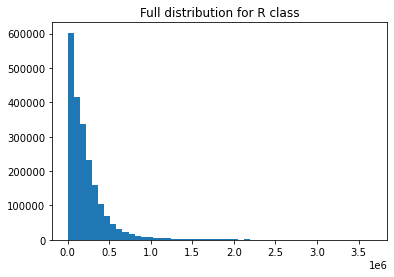

In [101]:
plt.hist(data[data['BLDGCL'].isin(R_classes)]['FULLVAL'],bins=50, range=(0, np.percentile(data[data['BLDGCL'].isin(R_classes)]['FULLVAL'],99)))
plt.title('Full distribution for R class')
plt.show()

## FULLVAL distributions for S-class buildings:

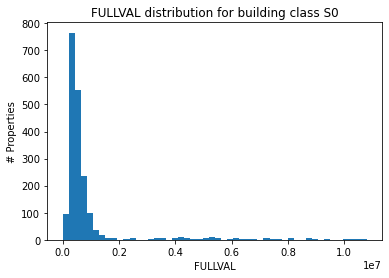

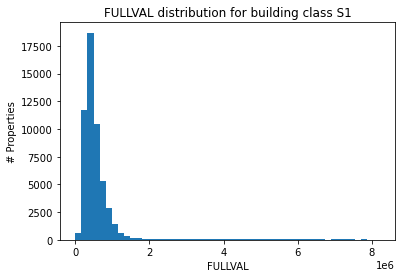

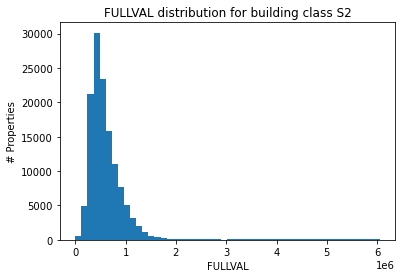

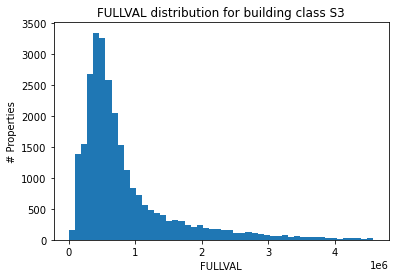

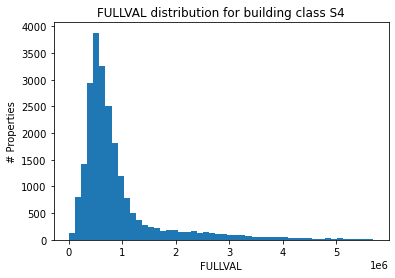

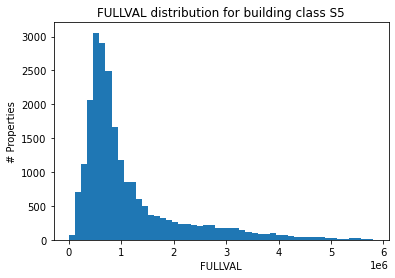

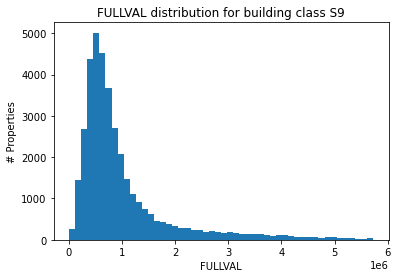

In [102]:
S_classes = ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S9']
for i in S_classes:
    class_dis(i)

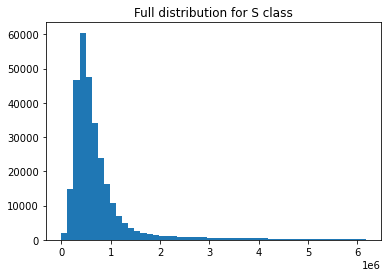

In [103]:
plt.hist(data[data['BLDGCL'].isin(S_classes)]['FULLVAL'],bins=50, range=(0, np.percentile(data[data['BLDGCL'].isin(S_classes)]['FULLVAL'],99)))
plt.title('Full distribution for S class')
plt.show()

## Exemption classification codes

Code dictionary here: https://data.cityofnewyork.us/City-Government/Exemption-Classification-Codes/myn9-hwsy/data

In [222]:
data['EXCD1'].unique()

array([  nan, 1017., 5110., 1523., 1601., 1021., 1010., 1015., 1985.,
       1401., 1602., 3390., 3410., 2350., 5129., 5116., 2152., 2191.,
       2500., 1920., 1501., 1872., 2151., 5106., 2280., 1101., 3500.,
       7120., 5112., 5109., 7160., 6800., 4520., 1022., 6200., 1604.,
       2133., 1505., 5108., 1850., 1403., 1650., 6120., 2251., 2231.,
       2202., 6320., 1301., 1402., 1404., 2252., 1605., 2201., 1522.,
       5101., 1521., 2400., 1511., 1640., 2120., 5102., 1504., 2261.,
       5130., 5105., 1603., 2132., 2220., 1990., 5111., 1023., 7165.,
       2232., 2171., 1840., 4550., 1881., 1660., 1986., 5103., 1630.,
       2131., 1880., 1841., 1016., 2100., 2233., 7150., 1620., 2310.,
       7170., 4600., 1870., 1606., 3380., 1572., 5114., 1891., 5107.,
       5113., 4530., 1571., 5104., 2134., 1102., 2172., 2262., 3400.,
       1882., 1951., 1700., 1019., 1871., 4650., 3360., 6400., 5118.,
       1200., 6600., 4500., 1011., 1562., 6170., 1961., 1963., 4540.,
       1561., 6140.,

## Working area

In [109]:
pd.DataFrame(data.columns).to_csv('columns.csv')

In [168]:
easements = data[data['EASEMENT'].isin(['A', 'B', 'E', 'F', 'G', 'H', 'I'])]

In [170]:
easements.to_csv('easements.csv')

In [166]:
pd.crosstab(index=data['EASEMENT'],columns='count')

col_0,count
EASEMENT,
A,4
B,1
E,36941
F,2648
G,910
H,293
I,140
J,72
K,47


In [212]:
filter = data['EXCD1'].unique()

In [214]:
filter.sort()

In [215]:
filter

array([1010., 1011., 1015., 1016., 1017., 1019., 1021., 1022., 1023.,
       1101., 1102., 1200., 1301., 1401., 1402., 1403., 1404., 1501.,
       1504., 1505., 1511., 1521., 1522., 1523., 1561., 1562., 1571.,
       1572., 1601., 1602., 1603., 1604., 1605., 1606., 1620., 1630.,
       1640., 1650., 1660., 1700., 1840., 1841., 1850., 1870., 1871.,
       1872., 1880., 1881., 1882., 1891., 1920., 1925., 1950., 1951.,
       1961., 1963., 1965., 1985., 1986., 1990., 1992., 2100., 2120.,
       2131., 2132., 2133., 2134., 2151., 2152., 2171., 2172., 2191.,
       2198., 2201., 2202., 2220., 2231., 2232., 2233., 2251., 2252.,
       2261., 2262., 2280., 2310., 2350., 2351., 2400., 2500., 2501.,
       3360., 3380., 3390., 3400., 3410., 3420., 3500., 3600., 3700.,
       3800., 4500., 4520., 4530., 4540., 4550., 4600., 4650., 5090.,
       5100., 5101., 5102., 5103., 5104., 5105., 5106., 5107., 5108.,
       5109., 5110., 5111., 5112., 5113., 5114., 5116., 5117., 5118.,
       5129., 5130.,

(array([  4514.,  15096.,  56655., 311483., 598609., 562780., 431350.,
        318012., 234400., 170231., 117221.,  78209.,  54513.,  37506.,
         27443.,  20413.,  15002.,  11873.,   9609.,   7843.,   6572.,
          5684.,   4897.,   4451.,   3936.,   3717.,   3358.,   3061.,
          2946.,   2522.,   2298.,   2189.,   1957.,   1753.,   1718.,
          1661.,   1465.,   1363.,   1205.,   1149.,   1125.,   1027.,
          1025.,    947.,    957.,    857.,    853.,    771.,    757.,
           726.]),
 array([      0.,   89640.,  179280.,  268920.,  358560.,  448200.,
         537840.,  627480.,  717120.,  806760.,  896400.,  986040.,
        1075680., 1165320., 1254960., 1344600., 1434240., 1523880.,
        1613520., 1703160., 1792800., 1882440., 1972080., 2061720.,
        2151360., 2241000., 2330640., 2420280., 2509920., 2599560.,
        2689200., 2778840., 2868480., 2958120., 3047760., 3137400.,
        3227040., 3316680., 3406320., 3495960., 3585600., 3675240.,
        

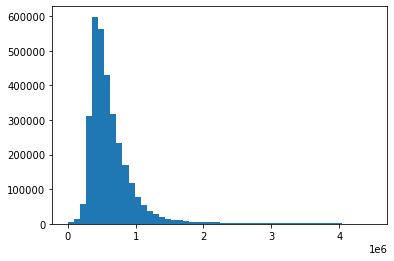

In [179]:
plt.hist(data[data['EXT'].isin(['EG', 'E', 'G'])]['FULLVAL'],bins=50, range=(0, np.percentile(data[data['EXT'].isin(['EG', 'E', 'G'])]['FULLVAL'],99)))

In [223]:
data[data['EXCD1'] == 1015]['STADDR']

121            133 EAST 30 STREET
169            333 EAST 30 STREET
239            155 EAST 34 STREET
385        116 CENTRAL PARK SOUTH
658            333 WEST 56 STREET
                    ...          
9844058          5 CHARLES STREET
9844107          5 EAST 22 STREET
9844844        210 WEST 19 STREET
9844975        455 WEST 35 STREET
9845327        254 WEST 12 STREET
Name: STADDR, Length: 293121, dtype: object

In [225]:
data['EXMPTCL'].unique()

array([nan, 'X6', 'X7', 'X5', 'X1', 'X9', 'X3', 'X4', 'X8', 'X2', 'KI',
       'VI', 'A9', 'R4', '5'], dtype=object)